In [3]:
!unzip ../Data/archive.zip -d ../Data
!unzip ../Data/State_time_series.csv.zip -d ../Data

Archive:  ../Data/archive.zip
  inflating: ../Data/USA_2022-06-26.csv  
  inflating: ../Data/USA_2022-07-03.csv  
  inflating: ../Data/USA_2022-07-10.csv  
  inflating: ../Data/USA_2022-07-17.csv  
  inflating: ../Data/USA_2022-07-24.csv  
  inflating: ../Data/USA_2022-07-31.csv  
  inflating: ../Data/USA_2022-08-07.csv  
  inflating: ../Data/USA_2022-08-14.csv  
  inflating: ../Data/USA_2022-08-21.csv  
  inflating: ../Data/USA_2022-08-28.csv  
  inflating: ../Data/USA_2022-09-04.csv  
  inflating: ../Data/USA_2022-09-11.csv  
  inflating: ../Data/USA_2022-09-18.csv  
  inflating: ../Data/USA_2022-09-25.csv  
  inflating: ../Data/USA_2022-10-02.csv  
  inflating: ../Data/USA_2022-10-09.csv  
  inflating: ../Data/USA_2022-10-16.csv  
  inflating: ../Data/USA_2022-10-23.csv  
  inflating: ../Data/USA_2022-10-30.csv  
  inflating: ../Data/USA_2022-11-06.csv  
  inflating: ../Data/USA_2022-11-13.csv  
  inflating: ../Data/USA_2022-11-20.csv  
  inflating: ../Data/USA_2022-11-27.csv  
  in

In [3]:
# unzip a file named archive.zip

!file ../Data/archive.zip


../Data/archive.zip: Zip archive data, at least v4.5 to extract, compression method=deflate


In [4]:
#imports
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

"""
Merge weekly CSV files in a given folder into a single CSV file.

Parameters
----------
folder_path : str
    Path to the folder containing your weekly CSV files.

Returns
-------
output_path : str
    Path to the merged CSV file.
"""
# Find all CSV files matching the pattern (e.g., USA_2022-*.csv)
csv_files = sorted(glob.glob(os.path.join("../Data", "USA_2022-*.csv")))

# List to hold each DataFrame
merged_data = []

# Loop through and read each file
for file_path in csv_files:
    try:
        # Read CSV
        df = pd.read_csv(file_path)

        # Extract snapshot date from filename
        filename = os.path.basename(file_path)
        snapshot_date = filename.replace("USA_", "").replace(".csv", "")
        df["snapshot_date"] = snapshot_date

        # Add to list
        merged_data.append(df)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Concatenate all dataframes
final_df = pd.concat(merged_data, ignore_index=True)
print("Merged data head")
print(final_df.head())
# Save to a new CSV
output_path = "../Data/merged_real_estate_data.csv"
final_df.to_csv(output_path, index=False)

print(f"✅ Merged {len(csv_files)} files into: {output_path}")
print(f"🧾 Final dataset shape: {final_df.shape}")



C:\Users\saipa\AppData\Local\Temp\ipykernel_16756\4177468994.py:24: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\saipa\AppData\Local\Temp\ipykernel_16756\4177468994.py:24: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Merged data head
   Unnamed: 0 country date_of_data_generation  \
0           0     USA              2022-06-26   
1           1     USA              2022-06-26   
2           2     USA              2022-06-26   
3           3     USA              2022-06-26   
4           4     USA              2022-06-26   

   homeData.addressInfo.centroid.centroid.latitude  \
0                                        34.848760   
1                                        33.662603   
2                                        33.766645   
3                                        33.529629   
4                                        34.819568   

   homeData.addressInfo.centroid.centroid.longitude homeData.addressInfo.city  \
0                                        -86.585090             Meridianville   
1                                        -86.601866                Trussville   
2                                        -87.038906                   Sumiton   
3                                      

In [6]:
input_path = "../Data/merged_real_estate_data.csv"
output_path = "../Data/cleaned_real_estate_data.csv"

# Load the dataset
df = pd.read_csv(input_path)

# Initial inspection
print("Original shape:", df.shape)
print("Initial columns:\n", df.columns.tolist())

# ======================================================================
# 1. Remove unnecessary columns
# ======================================================================
cols_to_drop = [
    'Unnamed: 0',
    'country',
    'homeData.directAccessInfo.timeZone.id',
    'homeData.url',
    'homeData.propertyId',
    'homeData.brokers.sellingBrokerAndAgent.brokerName',
    'homeData.brokers.sellingBrokerAndAgent.agentName',
    'homeData.brokers.sellingBrokerAndAgent.redfinAgentId.value',
    'homeData.brokers.listingBrokerAndAgent.redfinAgentId.value',
    'homeData.directAccessInfo.suspendedReason'
]
df = df.drop(columns=cols_to_drop, errors='ignore')

# ======================================================================
# 2. Rename columns with error handling
# ======================================================================
column_mapping = {
    'homeData.addressInfo.centroid.centroid.latitude': 'latitude',
    'homeData.addressInfo.centroid.centroid.longitude': 'longitude',
    'homeData.addressInfo.city': 'city',
    'homeData.addressInfo.state': 'state',
    'homeData.addressInfo.zip': 'zip_code',
    'homeData.baths.value': 'total_baths',
    'homeData.beds.value': 'beds',
    'homeData.daysOnMarket.daysOnMarket.value': 'days_on_market',
    'homeData.directAccessInfo.timeZone.description': 'timezone',
    'homeData.hoaDues.amount.value': 'hoa_dues',
    'homeData.hotnessData.isHot': 'is_hot',
    'homeData.listingMetadata.hasVirtualTour': 'has_virtual_tour',
    'homeData.listingMetadata.isNewConstruction': 'is_new_construction',
    'homeData.listingMetadata.isRedfin': 'is_redfin',
    'homeData.listingMetadata.listingType': 'listing_type',
    'homeData.listingMetadata.searchStatus': 'search_status',
    'homeData.lotSize.amount.value': 'lot_size_sqft',
    'homeData.priceInfo.amount.value': 'price',
    'homeData.priceInfo.priceType': 'price_type',
    'homeData.propertyType': 'property_type',
    'homeData.sqftInfo.amount.value': 'living_area_sqft',
    'homeData.yearBuilt.yearBuilt.value': 'year_built',
    'snapshot_date': 'snapshot_date',
    'date_of_data_generation': 'data_gen_date'
}

# Safe rename (ignore missing columns)
df = df.rename(columns=column_mapping, errors='ignore')

# ======================================================================
# 3. Handle missing values dynamically
# ======================================================================
# Identify remaining columns after preprocessing
print("\nColumns after preprocessing:", df.columns.tolist())

# Drop columns with >70% missing values (more lenient threshold)
threshold = len(df) * 0.3  # Keep columns with at least 30% data
df = df.dropna(thresh=threshold, axis=1)

# Dynamically identify numerical/categorical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Fill numerical missing values
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Fill categorical missing values
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna('Unknown')

# ======================================================================
# 4. Convert data types
# ======================================================================
date_cols = ['snapshot_date', 'data_gen_date']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

if 'zip_code' in df.columns:
    df['zip_code'] = df['zip_code'].astype(str).str[:5]

# ======================================================================
# 5. Remove duplicates
# ======================================================================
dup_cols = ['latitude', 'longitude', 'snapshot_date', 'price']
dup_cols = [col for col in dup_cols if col in df.columns]

if dup_cols:
    df = df.drop_duplicates(subset=dup_cols, keep='last')

# ======================================================================
# 6. Handle outliers safely
# ======================================================================
if 'price' in df.columns:
    df = df[(df['price'] > 10000) & (df['price'] < 20_000_000)]

if 'living_area_sqft' in df.columns:
    df = df[(df['living_area_sqft'] > 300) & (df['living_area_sqft'] < 20000)]

if 'year_built' in df.columns:
    current_year = pd.Timestamp.now().year
    df = df[(df['year_built'] > 1700) & (df['year_built'] <= current_year)]

# ======================================================================
# 7. Create new features conditionally
# ======================================================================
if all(col in df.columns for col in ['price', 'living_area_sqft']):
    df['price_per_sqft'] = df['price'] / df['living_area_sqft']

if 'lot_size_sqft' in df.columns:
    df['lot_size_acres'] = df['lot_size_sqft'] / 43560

# ======================================================================
# 8. Final cleanup
# ======================================================================
# Convert boolean columns to 1/0 if they exist
bool_cols = ['is_hot', 'has_virtual_tour', 'is_new_construction', 'is_redfin']
for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].astype(int)
print("Final shape:", df.shape)
print("Head of final dataset:")
print(df.head())
# Save cleaned data
df.to_csv(output_path, index=False)
print(f"\nCleaned data saved to {output_path}")
print("Final columns:", df.columns.tolist())


C:\Users\saipa\AppData\Local\Temp\ipykernel_16756\3650791816.py:5: DtypeWarning: Columns (38,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_path)


Original shape: (583343, 43)
Initial columns:
 ['Unnamed: 0', 'country', 'date_of_data_generation', 'homeData.addressInfo.centroid.centroid.latitude', 'homeData.addressInfo.centroid.centroid.longitude', 'homeData.addressInfo.city', 'homeData.addressInfo.state', 'homeData.addressInfo.zip', 'homeData.bathInfo.computedFullBaths', 'homeData.bathInfo.computedPartialBaths', 'homeData.bathInfo.computedTotalBaths', 'homeData.bathInfo.rawFullBaths', 'homeData.bathInfo.rawHalfBaths', 'homeData.bathInfo.rawQuarterBaths', 'homeData.bathInfo.rawThreeQuarterBaths', 'homeData.baths.value', 'homeData.beds.value', 'homeData.brokers.listingBrokerAndAgent.redfinAgentId.value', 'homeData.daysOnMarket.daysOnMarket.value', 'homeData.directAccessInfo.timeZone.description', 'homeData.directAccessInfo.timeZone.id', 'homeData.fullBaths.value', 'homeData.hoaDues.amount.value', 'homeData.hotnessData.isHot', 'homeData.listingMetadata.hasVirtualTour', 'homeData.listingMetadata.isNewConstruction', 'homeData.listingM

C:\Users\saipa\AppData\Local\Temp\ipykernel_16756\388273160.py:1: DtypeWarning: Columns (38,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/merged_real_estate_data.csv")


=== Data Overview ===

Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583343 entries, 0 to 583342
Data columns (total 43 columns):
 #   Column                                                      Non-Null Count   Dtype  
---  ------                                                      --------------   -----  
 0   Unnamed: 0                                                  583343 non-null  int64  
 1   country                                                     583343 non-null  object 
 2   date_of_data_generation                                     583343 non-null  object 
 3   homeData.addressInfo.centroid.centroid.latitude             583343 non-null  float64
 4   homeData.addressInfo.centroid.centroid.longitude            583343 non-null  float64
 5   homeData.addressInfo.city                                   583137 non-null  object 
 6   homeData.addressInfo.state                                  583317 non-null  object 
 7   homeData.addressInf

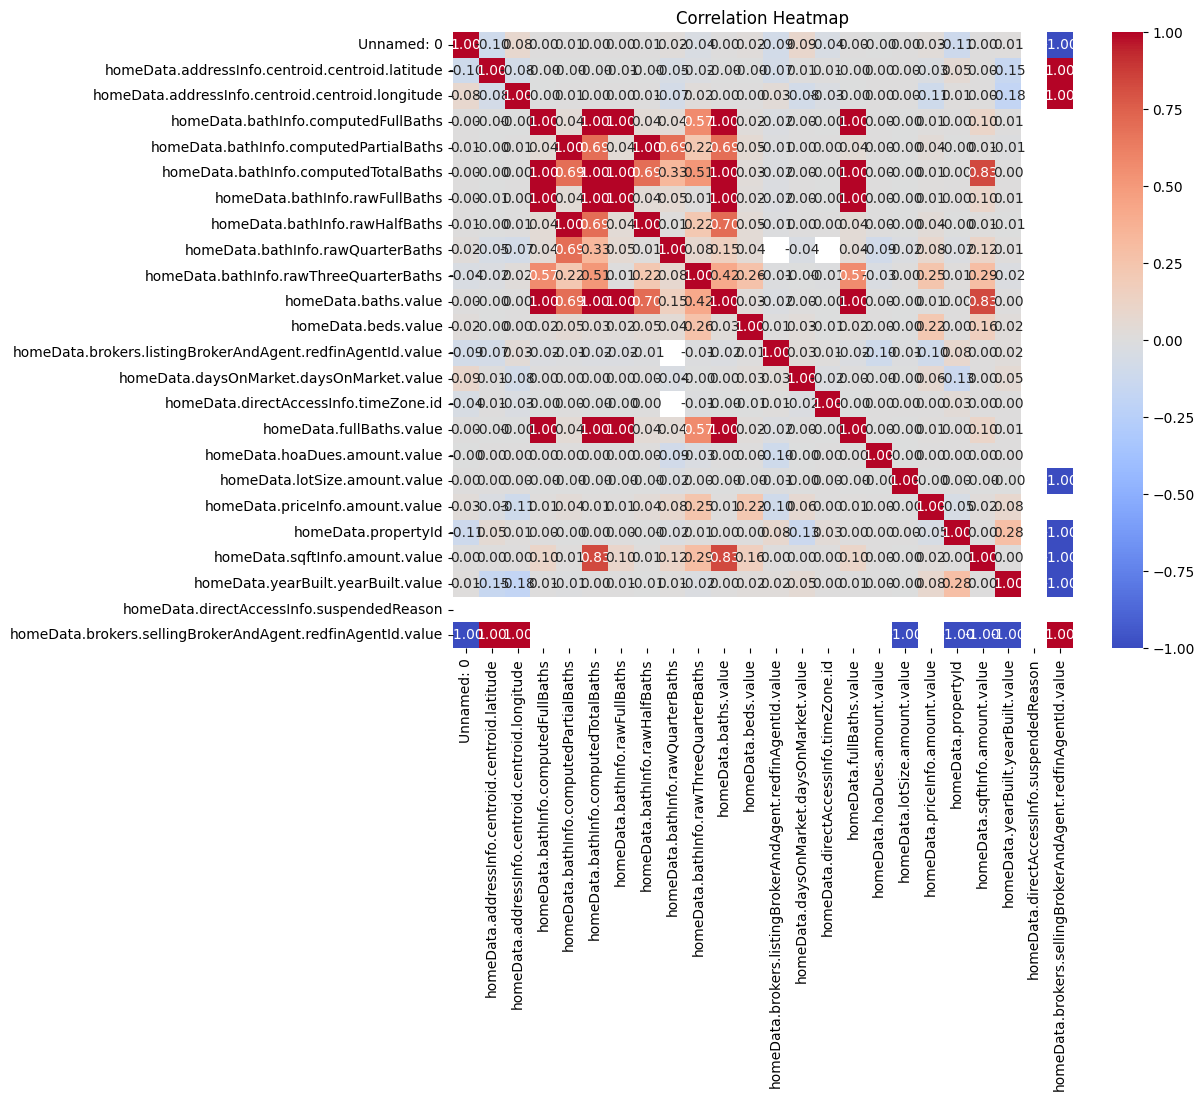


First 5 Rows of the Data:
   Unnamed: 0 country date_of_data_generation  \
0           0     USA              2022-06-26   
1           1     USA              2022-06-26   
2           2     USA              2022-06-26   
3           3     USA              2022-06-26   
4           4     USA              2022-06-26   

   homeData.addressInfo.centroid.centroid.latitude  \
0                                        34.848760   
1                                        33.662603   
2                                        33.766645   
3                                        33.529629   
4                                        34.819568   

   homeData.addressInfo.centroid.centroid.longitude homeData.addressInfo.city  \
0                                        -86.585090             Meridianville   
1                                        -86.601866                Trussville   
2                                        -87.038906                   Sumiton   
3                            

MemoryError: 

Error in callback <function _draw_all_if_interactive at 0x000001571537D300> (for post_execute), with arguments args (),kwargs {}:


MemoryError: 

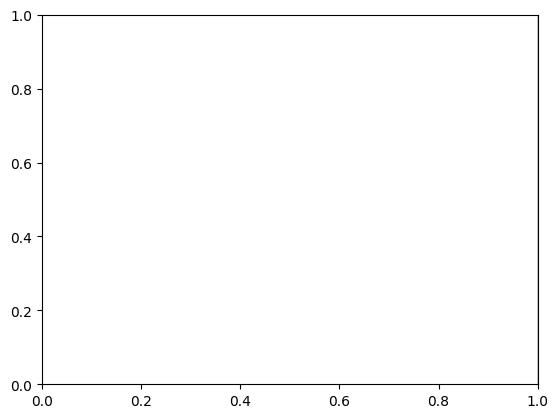

In [8]:
df = pd.read_csv("../Data/merged_real_estate_data.csv")
print("=== Data Overview ===")

# Basic info (datatypes, non-null counts)
print("\nData Types and Non-null Counts:")
print(df.info())

# Summary statistics for numerical columns
print("\nNumerical Features Summary:")
print(df.describe())

# Count unique values for categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical Features Summary:")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Check for missing values
print("\nMissing Values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Correlation matrix for numerical columns only
print("\nCorrelation Matrix for Numerical Features:")
num_df = df.select_dtypes(include=np.number)  # Only numerical columns
corr_matrix = num_df.corr()
print(corr_matrix)

# Visualize correlations with a heatmap (optional, if you want a plot)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# Show some basic row sample for better understanding
print("\nFirst 5 Rows of the Data:")
print(df.head())

# Dataset shape and column list
print(f"\nDataset Shape: {df.shape}")
print(f"Columns in Dataset: {df.columns.tolist()}")


print("\n=== Starting Exploratory Data Analysis ===")

# 2.1 Overview
print("Data Shape: ", df.shape)
print("Data Types: \n", df.dtypes)
print("Preview: \n", df.head())

# 2.2 Missing Values
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
if missing.empty:
    print("No missing values detected.")
else:
    print("Missing Values: \n", missing)

# 2.3 Statistical Summary
print("Statistical Summary: \n", df.describe())

# 2.4 Distributions
print("Saving distribution plots for numeric features...")
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    fname = f"eda_dist_{col}.png"
    #plt.show(fname)
    plt.savefig("../Reports/Graphs/"+fname)
    plt.close()
    print(f"  Saved {fname}")

# 2.5 Correlation Matrix
print("Saving correlation matrix plot...")
corr = df[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
#plt.savefig("eda_correlation_matrix.png")
plt.close()
#print("  Saved eda_correlation_matrix.png")

# 2.6 Time Series Trend: Average Price Over Time
print("Saving average price trend over time...")
ts = df.groupby('snapshot_date')['price'].mean().reset_index()
plt.figure()
sns.lineplot(x='snapshot_date', y='price', data=ts)
plt.title("Average Listing Price Over Time")
plt.show()
#plt.savefig("eda_price_trend.png")
plt.close()
#print("  Saved eda_price_trend.png")

# 2.7 City-wise Price Boxplot (Top 10 cities by count)
print("Saving price boxplot for top 10 cities...")
top_cities = df['city'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price', data=df[df['city'].isin(top_cities)])
plt.xticks(rotation=45)
plt.title("Price Distribution in Top 10 Cities")
plt.show()
#plt.savefig("eda_city_boxplot.png")
plt.close()
#print("  Saved eda_city_boxplot.png")

print("EDA completed. All plots saved to current directory.\n")



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: increase resolution for exports
plt.rcParams['figure.dpi'] = 120

# Load a larger subset if memory allows (adjust nrows as needed)
df = pd.read_csv("../Data/cleaned_real_estate_data.csv", usecols=[
    'price', 'living_area_sqft', 'beds', 'homeData.bathInfo.computedFullBaths',
    'homeData.bathInfo.computedPartialBaths', 'lot_size_sqft',
    'year_built', 'snapshot_date', 'city', 'state', 'price_per_sqft'
], nrows=10000)  # Adjust this row limit as needed


In [5]:
# Rename for simplicity
df.rename(columns={
    'homeData.bathInfo.computedFullBaths': 'full_baths',
    'homeData.bathInfo.computedPartialBaths': 'partial_baths'
}, inplace=True)

# Type conversion
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'], errors='coerce')
df['year_built'] = pd.to_numeric(df['year_built'], errors='coerce')


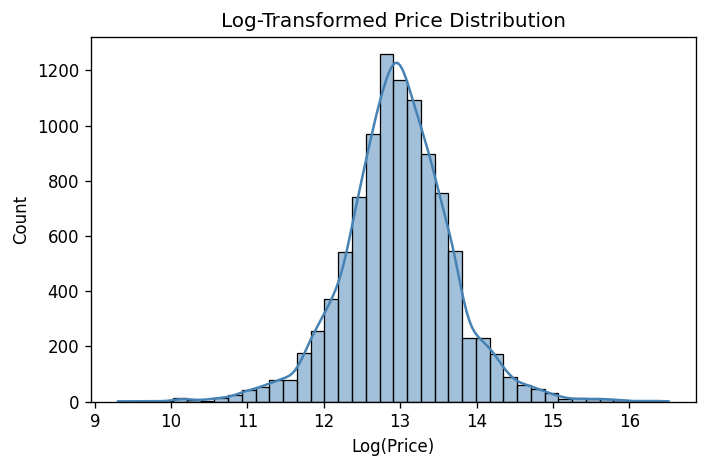

In [6]:
plt.figure(figsize=(6, 4))
sns.histplot(np.log1p(df['price']), bins=40, kde=True, color='steelblue')
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log(Price)")
plt.tight_layout()
plt.savefig("eda_log_price.png")
plt.show()


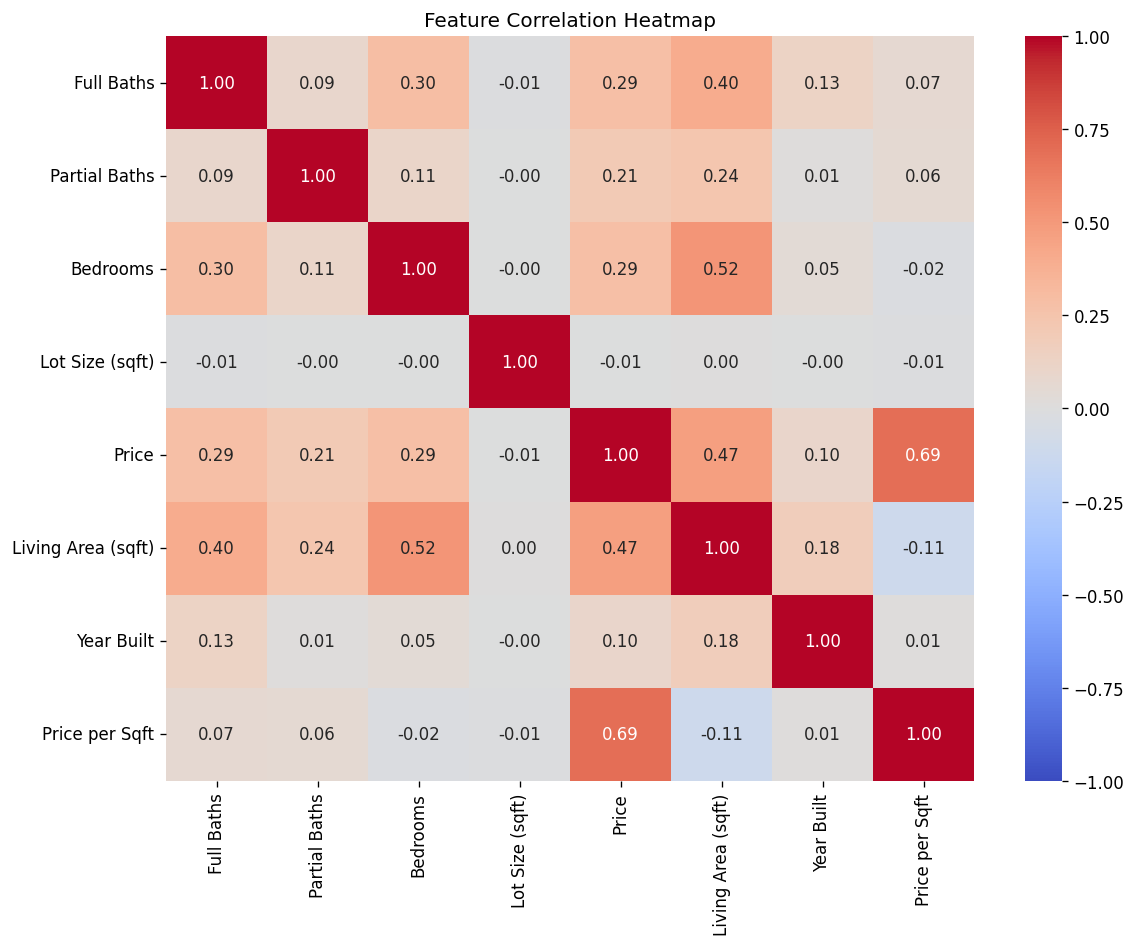

In [11]:
# Rename columns for plot readability
col_renames = {
    'full_baths': 'Full Baths',
    'partial_baths': 'Partial Baths',
    'beds': 'Bedrooms',
    'lot_size_sqft': 'Lot Size (sqft)',
    'price': 'Price',
    'living_area_sqft': 'Living Area (sqft)',
    'year_built': 'Year Built',
    'price_per_sqft': 'Price per Sqft'
}

# Apply renaming for visualization
df_viz = df.rename(columns=col_renames)
corr = df_viz[list(col_renames.values())].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("eda_correlation_heatmap_named.png")
plt.show()


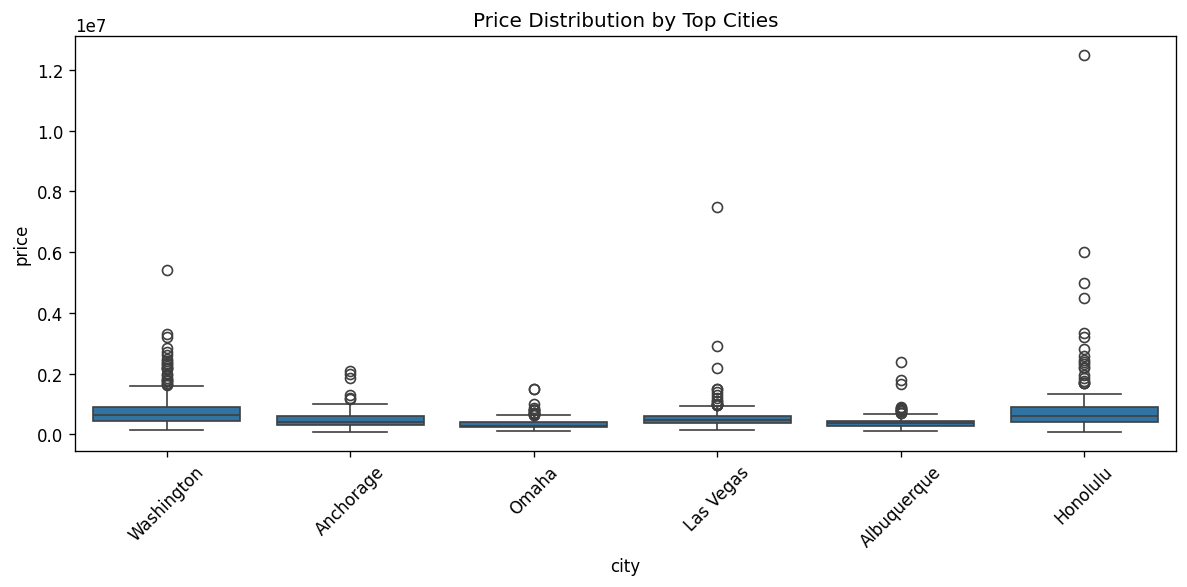

In [8]:
top_cities = df['city'].value_counts().head(6).index
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[df['city'].isin(top_cities)], x='city', y='price')
plt.xticks(rotation=45)
plt.title("Price Distribution by Top Cities")
plt.tight_layout()
plt.savefig("eda_city_boxplot.png")
plt.show()


In [9]:
if df['snapshot_date'].nunique() > 1:
    price_trend = df.groupby('snapshot_date')['price'].mean().reset_index()
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=price_trend, x='snapshot_date', y='price')
    plt.title("Average Price Over Time")
    plt.tight_layout()
    plt.savefig("eda_price_trend.png")
    plt.show()


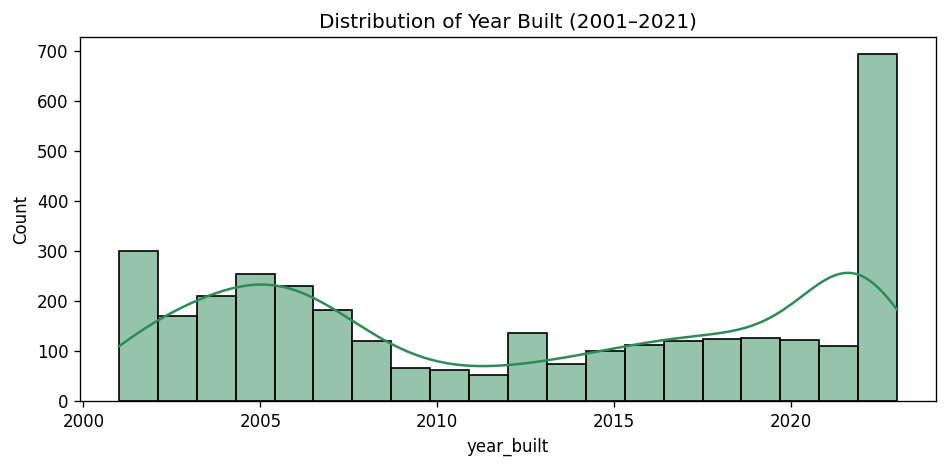

In [10]:
df_recent = df[df['year_built'] >= 2001]
plt.figure(figsize=(8, 4))
sns.histplot(df_recent['year_built'].dropna(), bins=20, kde=True, color='seagreen')
plt.title("Distribution of Year Built (2001–2021)")
plt.tight_layout()
plt.savefig("eda_year_built_recent.png")
plt.show()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by state and compute means
state_stats = df.groupby("state").agg({
    "price": "mean",
    "price_per_sqft": "mean",
    "lot_size_sqft": "mean"
}).round(2).sort_values(by="price_per_sqft", ascending=False)

# Split top 5 and bottom 5 by price per sqft
top_states = state_stats.head(5).copy()
bottom_states = state_stats.tail(5).copy()

# Combine for plotting
combined = pd.concat([top_states, bottom_states])
combined.reset_index(inplace=True)


C:\Users\saipa\AppData\Local\Temp\ipykernel_12292\520373232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined, x='state', y='price_per_sqft', palette='viridis')


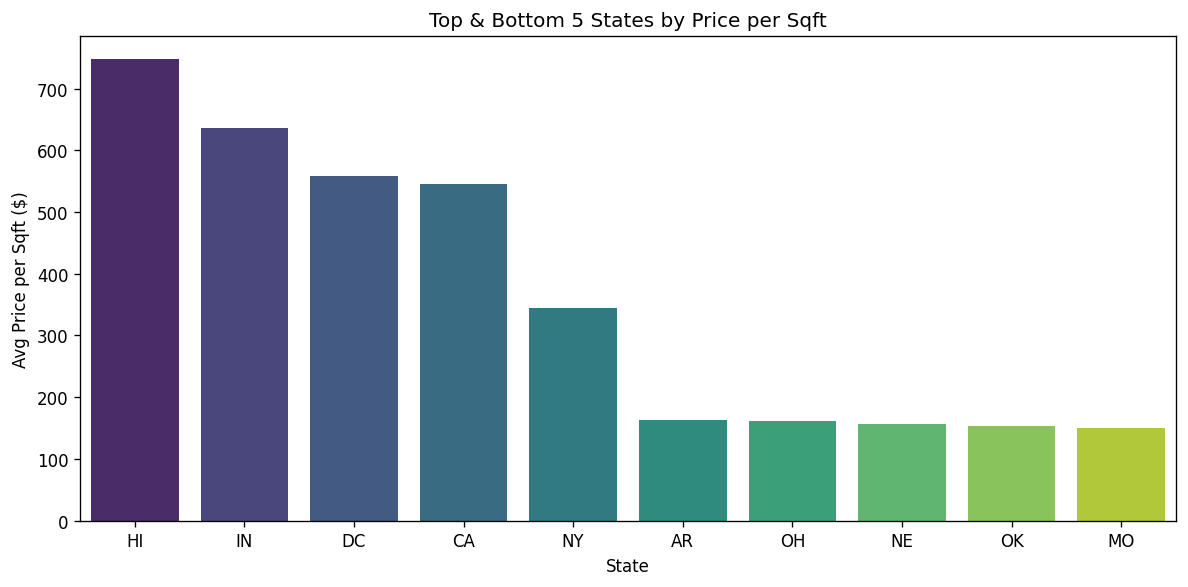

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=combined, x='state', y='price_per_sqft', palette='viridis')
plt.title("Top & Bottom 5 States by Price per Sqft")
plt.ylabel("Avg Price per Sqft ($)")
plt.xlabel("State")
plt.tight_layout()
plt.savefig("../Reports/Graphs/price_per_sqft_by_state.png")
plt.show()


In [19]:
import plotly.express as px
import plotly.io as pio

# Force Plotly to use browser instead of inline rendering
pio.renderers.default = "browser"

# Plot
fig = px.bar(
    combined,
    x='state',
    y='price_per_sqft',
    hover_data=['price', 'lot_size_sqft'],
    color='price_per_sqft',
    title="Top & Bottom 5 States by Price per Sqft",
    labels={'price_per_sqft': 'Price per Sqft ($)', 'state': 'State'}
)

fig.show()  # This will open in your web browser


In [20]:
import plotly.express as px

# Identify top 10 cities by number of listings (across all states)
top_10_cities_all = df['city'].value_counts().head(10).index

# Filter data to only those top 10 cities
df_top_10_cities = df[df['city'].isin(top_10_cities_all)]

# Create the scatter plot
fig = px.scatter(
    df_top_10_cities,
    x="living_area_sqft",
    y="price",
    color="city",
    title="Price vs Living Area for Top 10 Cities in the US",
    labels={"living_area_sqft": "Living Area (sqft)", "price": "Price (USD)"},
    hover_data=["state", "beds", "full_baths", "year_built"]
)

# Optional: use a dark theme
fig.update_layout(template="plotly_dark")
fig.show()


In [23]:
import plotly.express as px

# Choose the state you want to focus on (change "FL" as needed)
target_state = "CA"

# Filter for the target state
state_df = df[df["state"] == target_state]

# Find top 10 cities in that state by listing count
top_10_cities_state = state_df["city"].value_counts().head(20).index

# Filter data to only those cities
state_top_cities_df = state_df[state_df["city"].isin(top_10_cities_state)]

# Create scatter plot
fig = px.scatter(
    state_top_cities_df,
    x="living_area_sqft",
    y="price",
    color="city",
    title=f"Price vs Living Area for Top 10 Cities in {target_state}",
    labels={"living_area_sqft": "Living Area (sqft)", "price": "Price (USD)"},
    hover_data=["beds", "full_baths", "year_built"]
)

# Dark theme styling (optional)
fig.update_layout(template="plotly_dark")
fig.show()
